In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [3]:
def IndOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]
#a=[3,4,6,2]
#print IndOfSortedFea(a)

In [4]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        rf.fit(x[train],y[train])
        prediction=rf.predict(x[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [5]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=2.,n_components=x.shape[1])
    x_kpca=kpca.fit_transform(x)
    
    xT=np.concatenate((x,x_kpca),axis=1)
    
#     rank=[]
    numOfFeatures=xT.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(xT[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [6]:
def layer_rbf_c(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=2.,n_components=x.shape[1])
    x_kpca=kpca.fit_transform(x)
    
    xT=np.concatenate((x,x_kpca),axis=1)
    
#     rank=[]
    numOfFeatures=xT.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(xT[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
#     dif =[]
#     for i in xrange(numOfFeatures-1):
#         dif.append(featureSelectedErrors[i+1]-featureSelectedErrors[i])
#     choice=featureSelectedErrors.index(min(featureSelectedErrors))
    choice=selectChoice(featureSelectedErrors)
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [7]:
def selectChoice(featureSelectedErrors):
    """
    return a index of given error return a index of which
    trend of increasing or decreasing is minimum
    """
    dif =[]
    numOfFeatures=len(featureSelectedErrors)
    for i in xrange(numOfFeatures-1):
        dif.append(featureSelectedErrors[i+1]-featureSelectedErrors[i])
    dif=np.abs(dif)
# choice=dif.index(min(dif))+1
    choice=0
    for i in xrange(len(dif)):
        if dif[i]<0.001:
            choice=i
            break
        else:
            choice=i
    return choice

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()

In [9]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x[y == t,i],x[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [10]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [11]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i
        print 

In [12]:
iris=load_iris()
x=iris.data
y=iris.target

In [13]:
%matplotlib

Using matplotlib backend: WXAgg


In [16]:
result1,e1,cm1=layer_rbf(x,y)
printCM(cm1)

[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]

[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]



In [17]:
print result1.shape

(150L, 4L)


In [18]:
plotErr(e1)
print e1[result1.shape[1]]

0.0466666666667


In [19]:
result2,e2,cm2=layer_rbf(result1,y)
printCM(cm2)

[[ 6  0  0]
 [ 0  9  1]
 [ 0  2 12]]

[[10  0  0]
 [ 0  6  2]
 [ 0  0 12]]

[[ 9  0  0]
 [ 0 17  0]
 [ 0  1  3]]

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]



In [20]:
print result2.shape

(150L, 4L)


In [21]:
plotErr(e2)
print e2[result2.shape[1]]

0.04


In [22]:
result3,e3,cm3=layer_rbf(result2,y)
printCM(cm3)

[[ 6  0  0]
 [ 0 11  1]
 [ 0  1 11]]

[[12  0  0]
 [ 0  9  2]
 [ 0  0  7]]

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

[[12  0  0]
 [ 0  7  0]
 [ 0  2  9]]



In [23]:
plotErr(e3)
print e3[result3.shape[1]]

0.0666666666667


In [24]:
print result3.shape

(150L, 2L)


In [25]:
result4,e4,cm4=layer_rbf(result3,y)
printCM(cm4)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]

[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]

[[ 8  0  0]
 [ 0 12  1]
 [ 0  1  8]]

[[ 7  0  0]
 [ 0 12  1]
 [ 0  1  9]]



In [26]:
plotErr(e4)
print e4[result4.shape[1]]

0.0466666666667


In [27]:
print result4.shape

(150L, 2L)


In [28]:
result5,e5,cm5=layer_rbf(result4,y)
printCM(cm5)

[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]

[[ 8  0  0]
 [ 0 11  1]
 [ 0  1  9]]

[[15  0  0]
 [ 0 11  1]
 [ 0  0  3]]

[[ 8  0  0]
 [ 0  8  0]
 [ 0  0 14]]

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]



In [29]:
plotErr(e5)
print e5[result5.shape[1]]

0.0333333333333


In [30]:
print result5.shape

(150L, 2L)


In [28]:
iris=load_iris()
x=iris.data
y=iris.target

In [29]:
result1,e1,cm1=layer_rbf_c(x,y)
printCM(cm1)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]

[[ 8  0  0]
 [ 0  7  1]
 [ 0  4 10]]

[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]



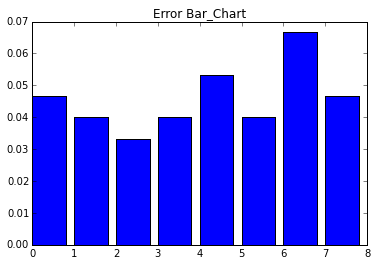

Choice of Error:  0.0533333333333


In [30]:
plotErr(e1)
print "Choice of Error: ", e1[result1.shape[1]]

In [31]:
print result1.shape

(150L, 4L)


In [32]:
result2,e2,cm2=layer_rbf_c(result1,y)
printCM(cm2)

[[10  0  0]
 [ 0 11  2]
 [ 0  1  6]]

[[ 8  0  0]
 [ 0 12  1]
 [ 0  0  9]]

[[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]

[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]

[[ 8  0  0]
 [ 0  7  0]
 [ 0  4 11]]



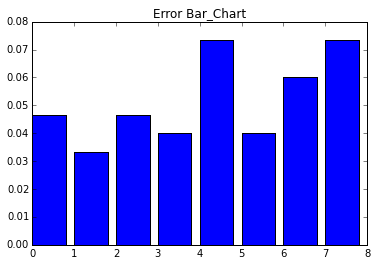

Choice of Error:  0.0733333333333


In [33]:
plotErr(e2)
print "Choice of Error: ", e2[result2.shape[1]]

In [34]:
print result2.shape

(150L, 4L)


In [35]:
result3,e3,cm3=layer_rbf_c(result2,y)
printCM(cm3)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]

[[10  0  0]
 [ 0 10  1]
 [ 0  1  8]]

[[ 9  0  0]
 [ 0  7  1]
 [ 0  2 11]]

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]



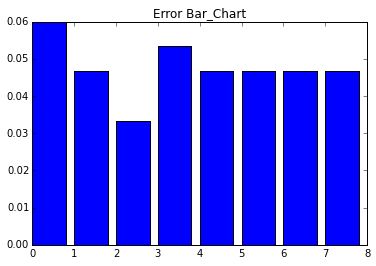

Choice of Error:  0.0466666666667


In [36]:
plotErr(e3)
print "Choice of Error: ", e3[result3.shape[1]]

In [37]:
print result3.shape

(150L, 4L)


In [38]:
result4,e4,cm4=layer_rbf_c(result3,y)
printCM(cm4)

[[ 7  0  0]
 [ 0  9  1]
 [ 0  2 11]]

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]

[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 12]]

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]



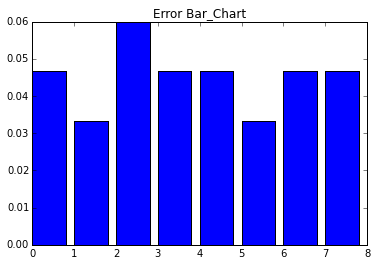

Choice of Error:  0.0466666666667


In [39]:
plotErr(e4)
print "Choice of Error: ", e4[result4.shape[1]]

In [40]:
print result4.shape

(150L, 4L)


In [41]:
result5,e5,cm5=layer_rbf_c(result4,y)
printCM(cm5)

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]



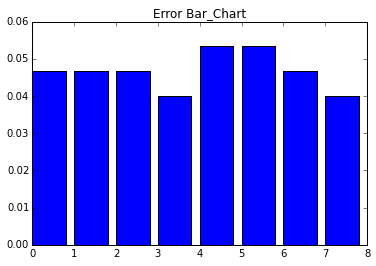

Choice of Error:  0.0466666666667


In [42]:
plotErr(e5)
print "Choice of Error: ", e5[result5.shape[1]]

In [43]:
print result5.shape

(150L, 1L)


In [44]:
result6,e6,cm6=layer_rbf_c(result5,y)
printCM(cm6)

[[12  0  0]
 [ 0 13  0]
 [ 0  1  4]]

[[10  0  0]
 [ 0  6  0]
 [ 0  1 13]]

[[11  0  0]
 [ 0  5  1]
 [ 0  1 12]]

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]

[[ 9  0  0]
 [ 0 13  1]
 [ 0  0  7]]



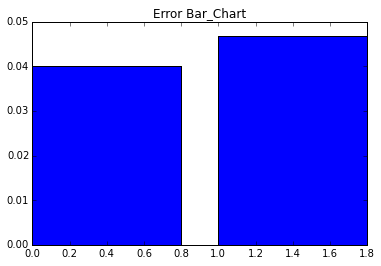

Choice of Error:  0.0466666666667


In [45]:
plotErr(e6)
print "Choice of Error: ", e6[result6.shape[1]]

In [46]:
print result6.shape

(150L, 1L)


In [47]:
result7,e7,cm7=layer_rbf_c(result6,y)
printCM(cm6)

[[12  0  0]
 [ 0 13  0]
 [ 0  1  4]]

[[10  0  0]
 [ 0  6  0]
 [ 0  1 13]]

[[11  0  0]
 [ 0  5  1]
 [ 0  1 12]]

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]

[[ 9  0  0]
 [ 0 13  1]
 [ 0  0  7]]



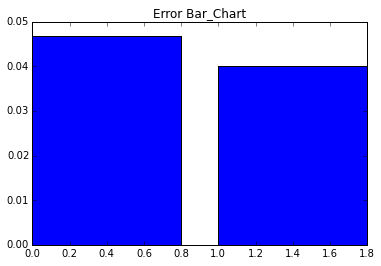

Choice of Error:  0.04


In [48]:
plotErr(e7)
print "Choice of Error: ", e7[result7.shape[1]]

In [49]:
print result7.shape

(150L, 1L)


In [50]:
result8,e8,cm8=layer_rbf_c(result7,y)
printCM(cm6)

[[12  0  0]
 [ 0 13  0]
 [ 0  1  4]]

[[10  0  0]
 [ 0  6  0]
 [ 0  1 13]]

[[11  0  0]
 [ 0  5  1]
 [ 0  1 12]]

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]

[[ 9  0  0]
 [ 0 13  1]
 [ 0  0  7]]



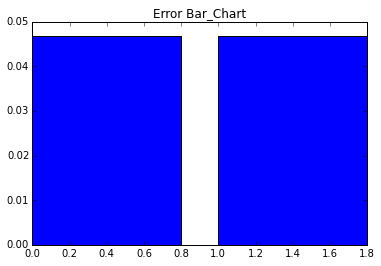

Choice of Error:  0.0466666666667


In [51]:
plotErr(e8)
print "Choice of Error: ", e8[result8.shape[1]]

In [52]:
print result8.shape

(150L, 1L)
